In [2]:
import numpy as np
import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt

from time import time

from common import *
from generate import *
from filter_kruskal import *

In [2]:
common.run(args="--help")

Allowed options:
  -h [ --help ]                      produce help message
  -m [ --mst-kernel ] arg (=1)       Kernel used calculating MST. 0 = regular 
                                     kruskal, 1 = filter-kruskal
  -s [ --sort-kernel ] arg (=1)      Kernel used for sort() [int]
  -p [ --partition-kernel ] arg (=2) Kernel used for partition() [int]
  -f [ --filter-kernel ] arg (=1)    Kernel used for filter() [int]
  -c [ --compress-kernel ] arg (=1)  Kernel used for compress() [int]
  -r [ --recusion-depth ] arg (=32)  Kernel used for compress() [int]
  -n [ --repetitions ] arg (=1)      Number of times the MST calculation is 
                                     repeated [int]
  -i [ --inputfile ] arg             input file containing graph data. Filepath
                                     must be relative to Ex2/
  -t [ --ouputfile_timings ] arg     Output file for timings. Filepath must be 
                                     relative to Ex2/



In [2]:
args = f"--inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 1"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 1
159705 Edges loaded

Benchmark results:
Initialize	µ=0.362825s	sigma=0s	total=0.362825	num_calls=1
Kruskal()	µ=0.075853s	sigma=0s	total=0.075853	num_calls=1
compress()	µ=0.00100164s	sigma=0s	total=0.00100164	num_calls=1
filter()	µ=0.000324075s	sigma=4.3641e-05s	total=0.000972225	num_calls=3
grow MST	µ=0.00320326s	sigma=0s	total=0.00320326	num_calls=1
partition()	µ=0.00306559s	sigma=0.00038166s	total=0.00919678	num_calls=3
sort()	µ=0.0726446s	sigma=0s	total=0.0726446	num_calls=1
total	µ=0.449891s	sigma=0s	total=0.449891	num_calls=1


,tag,average,std_dev,total,num_calls
0,Initialize,0.362825,0.000000,0.362825,1
1,Kruskal(),0.075853,0.000000,0.075853,1
2,compress(),0.001002,0.000000,0.001002,1
3,filter(),0.000324,0.000044,0.000972,3
4,grow MST,0.003203,0.000000,0.003203,1
5,partition(),0.003066,0.000382,0.009197,3
6,sort(),0.072645,0.000000,0.072645,1
7,total,0.449891,0.000000,0.449891,1


In [40]:
args = f"--inputfile benchmark_data/barabasi_12800_50pct.csv --mst-kernel 1 -s 1 -n 1"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_12800_50pct.csv --mst-kernel 1 -s 1 -n 1
40966875 Edges loaded

Benchmark results:
Initialize	µ=0.815199s	sigma=0s	total=0.815199	num_calls=1
Kruskal()	µ=0.584113s	sigma=0s	total=0.584113	num_calls=1
compress()	µ=0.254476s	sigma=0s	total=0.254476	num_calls=1
filter()	µ=0.0416113s	sigma=0.00446166s	total=0.0832226	num_calls=2
grow MST	µ=0.0383446s	sigma=0s	total=0.0383446	num_calls=1
partition()	µ=0.615566s	sigma=0.0904045s	total=1.23113	num_calls=2
sort()	µ=0.545761s	sigma=0s	total=0.545761	num_calls=1
total	µ=2.99206s	sigma=0s	total=2.99206	num_calls=1


,tag,average,std_dev,total,num_calls
0,Initialize,0.815199,0.000000,0.815199,1
1,Kruskal(),0.584113,0.000000,0.584113,1
2,compress(),0.254476,0.000000,0.254476,1
3,filter(),0.041611,0.004462,0.083223,2
4,grow MST,0.038345,0.000000,0.038345,1
5,partition(),0.615566,0.090404,1.231130,2
6,sort(),0.545761,0.000000,0.545761,1
7,total,2.992060,0.000000,2.992060,1


In [44]:
args = f"--inputfile benchmark_data/barabasi_3200_50pct.csv --mst-kernel 1 -s 1 -n 1"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_3200_50pct.csv --mst-kernel 1 -s 1 -n 1
2558947 Edges loaded

Benchmark results:
Initialize	µ=0.344806s	sigma=0s	total=0.344806	num_calls=1
Kruskal()	µ=0.072298s	sigma=0s	total=0.072298	num_calls=1
compress()	µ=0.0159131s	sigma=0s	total=0.0159131	num_calls=1
filter()	µ=0.00203554s	sigma=0.000539665s	total=0.0101777	num_calls=5
grow MST	µ=0.00454872s	sigma=0s	total=0.00454872	num_calls=1
partition()	µ=0.0153122s	sigma=0.00780027s	total=0.0765608	num_calls=5
sort()	µ=0.0677437s	sigma=0s	total=0.0677437	num_calls=1
total	µ=0.520848s	sigma=0s	total=0.520848	num_calls=1


,tag,average,std_dev,total,num_calls
0,Initialize,0.344806,0.00000,0.344806,1
1,Kruskal(),0.072298,0.00000,0.072298,1
2,compress(),0.015913,0.00000,0.015913,1
3,filter(),0.002036,0.00054,0.010178,5
4,grow MST,0.004549,0.00000,0.004549,1
5,partition(),0.015312,0.00780,0.076561,5
6,sort(),0.067744,0.00000,0.067744,1
7,total,0.520848,0.00000,0.520848,1


In [45]:
args = f"--inputfile benchmark_data/barabasi_12800_50pct.csv --mst-kernel 1 -s 1 -n 10"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_12800_50pct.csv --mst-kernel 1 -s 1 -n 10
40966875 Edges loaded


CalledProcessError: Command '['/home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2', '--ouputfile_timings', '/home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv', '--inputfile', 'benchmark_data/barabasi_12800_50pct.csv', '--mst-kernel', '1', '-s', '1', '-n', '10']' died with <Signals.SIGKILL: 9>.

In [3]:
def out_file_name(single_run):
    return single_run['prefix'] + "_" + str(single_run['n_nodes']) + "_" + str(single_run['density']) + ".csv"

def do_benchmark_runs(list_of_runs):
    for single_run in list_of_runs:
        args = f"--inputfile benchmark_data/barabasi_{single_run['n_nodes']}_{single_run['density']}.csv {single_run['flags']}"
        out_file = out_file_name(single_run)
        common.run_benchmark(common.OUT_DIR / out_file, args=args, print_output=False)


In [26]:
whatever_runs = [{'n_nodes': 200, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 400, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 800, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 1600, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 3200, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 6400, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 200, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 400, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 800, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 1600, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'}
                ]

n_nodes_list_d10 = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
n_nodes_list_d50 = [50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]
n_nodes_list_d90 = [25, 50, 100, 200, 400, 800, 1600, 3200, 6400]

filter_kruskal_runs_d50 = []
for n_nodes in n_nodes_list_d50[:-1]:
    filter_kruskal_runs_d50.append({'n_nodes': n_nodes, 'density': '50pct', 'prefix':'filter_kruskal', 'flags':'-n 10'})
# only 3 repetitions on the biggest graph
filter_kruskal_runs_d50.append({'n_nodes': n_nodes, 'density': '50pct', 'prefix':'filter_kruskal', 'flags':'-n 3'})

standard_kruskal_runs_d50 = []
for n_nodes in n_nodes_list_d50[:-1]:
    standard_kruskal_runs_d50.append({'n_nodes': n_nodes, 'density': '50pct', 'prefix':'standard_kruskal', 'flags':'-n 10'})
# only 3 repetitions on the biggest graph
standard_kruskal_runs_d50.append({'n_nodes': n_nodes, 'density': '50pct', 'prefix':'standard_kruskal', 'flags':'-n 3'})




In [17]:

# collect run times for plotting
def collect_run_times(list_of_runs):
    results = {}
    row_labels = []

    for single_run in list_of_runs:
        file_name = out_file_name(single_run)
        df = pd.read_csv(common.OUT_DIR / file_name, sep=';')
        df.set_index('tag',inplace=True)
        run_time = df.loc['total']['average']
        row_label = single_run['prefix'] + "_" + single_run['density']
        if not(row_label in row_labels):
            row_labels.append(row_label)
            results[row_label+"_x"] = []
            results[row_label+"_y"] = []
        results[row_label+"_x"].append(single_run['n_nodes'])
        results[row_label+"_y"].append(run_time)
    return row_labels, results


In [23]:
#plotting
def plotting(row_labels, results):
    for row_label in row_labels:
        plt.loglog(results[row_label+'_x'], results[row_label+'_y'], label=row_label, marker='o')
    plt.legend()
    plt.grid()
    plt.xlabel('number of nodes')
    plt.ylabel('execution time in s')

In [ ]:
do_benchmark_runs(filter_kruskal_runs_d50)

In [ ]:
do_benchmark_runs(standard_kruskal_runs_d50)

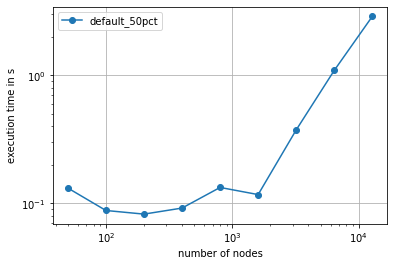

In [24]:
labels, results = collect_run_times(default_runs_d50)
plotting(labels, results)